# Loading The Model


To load model from HuggingFace, there are several ways, such as pipelines and loading model directly



```
Used model reference: https://huggingface.co/dslim/bert-base-NER?library=transformers
```






In [ ]:
!pip install transformers torch seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 111.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

# 1) NER using BERT Model

In [ ]:
from transformers import AutoTokenizer, AutoModelForTokenClassification, pipeline, AutoModelForSequenceClassification
import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
ner_tokenizer = AutoTokenizer.from_pretrained("dslim/bert-base-NER")
ner_model = AutoModelForTokenClassification.from_pretrained("dslim/bert-base-NER")
ner_pipeline = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer, grouped_entities=True)

ner_sentences = [
    "OpenAI introduced GPT-4 in 2023.",
    "Transformer models are introduced in 2017.",
    "Turing Test proposed in 1950 by Alan Turing.",
    "Anna Karenina written by Leo Tolstoy, is selected best book in history by 125 writers.",
    "HuggingFace is a New York, USA based company.",
    "In Germany, in 1440, goldsmith Johannes Gutenberg invented the movable-type printing press.",
    "The Renaissance's intellectual basis was founded in its version of humanism.",
    "I will commit this notebook to GitHub, which is a version control system that uses Git.",
    "BERT is a bidirectional transformer pretrained on unlabeled text to predict masked tokens in a sentence.",
    "ChatGPT, built on generative pre-trained transformer."
]

ner_results = []
for sentence in ner_sentences:
    entities = ner_pipeline(sentence)
    for entity in entities:
        ner_results.append({
            "Sentence": sentence,
            "Entity": entity['word'],
            "Label": entity['entity_group'],
            "Score": round(entity['score'], 2)
        })

ner_df = pd.DataFrame(ner_results)
ner_df

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Device set to use cpu
/usr/local/lib/python3.11/dist-packages/transformers/pipelines/token_classification.py:170: UserWarning: `grouped_entities` is deprecated and will be removed in version v5.0.0, defaulted to `aggregation_strategy="AggregationStrategy.SIMPLE"` instead.
  warnings.warn(


,Sentence,Entity,Label,Score
0,OpenAI introduced GPT-4 in 2023.,OpenAI,ORG,0.99
1,OpenAI introduced GPT-4 in 2023.,GPT - 4,MISC,0.95
2,Turing Test proposed in 1950 by Alan Turing.,Turing Test,MISC,0.99
3,Turing Test proposed in 1950 by Alan Turing.,Alan Turing,PER,0.99
4,"Anna Karenina written by Leo Tolstoy, is selec...",Anna Karenina,MISC,0.97
5,"Anna Karenina written by Leo Tolstoy, is selec...",Leo Tolstoy,PER,0.98
6,"HuggingFace is a New York, USA based company.",Hu,ORG,0.88
7,"HuggingFace is a New York, USA based company.",##Face,ORG,0.97
8,"HuggingFace is a New York, USA based company.",New York,LOC,0.96
9,"HuggingFace is a New York, USA based company.",USA,LOC,0.95


# 2) Sentiment Analysis Using Transformer

In [ ]:
from transformers import pipeline

sentiment_pipeline = pipeline("sentiment-analysis", model="distilbert-base-uncased-finetuned-sst-2-english")

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import csv

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/NLP_Assignment/tripadvisor_reviews.csv', quoting=csv.QUOTE_NONE, on_bad_lines='skip', encoding='utf-8', delimiter=';')
sentiment_sentences = df["Review"].dropna().tolist()

In [ ]:
sentiment_results = []

for sentence in sentiment_sentences:
    prediction = sentiment_pipeline(sentence)[0]
    sentiment_results.append({
        "Sentence": sentence,
        "Sentiment": prediction["label"],
        "Confidence": round(prediction["score"], 2)
    })

In [ ]:
sentiment_df = pd.DataFrame(sentiment_results)
display(sentiment_df)

,Sentence,Sentiment,Confidence
0,nice hotel expensive parking got good deal sta...,POSITIVE,0.71
1,ok nothing special charge diamond member hilto...,NEGATIVE,1.00
2,nice rooms not 4* experience hotel monaco seat...,NEGATIVE,1.00
3,"unique, great stay, wonderful time hotel monac...",POSITIVE,1.00
4,"great stay great stay, went seahawk game aweso...",NEGATIVE,0.84
5,love monaco staff husband stayed hotel crazy w...,POSITIVE,0.81
6,"cozy stay rainy city, husband spent 7 nights m...",POSITIVE,1.00
7,"excellent staff, housekeeping quality hotel ch...",POSITIVE,1.00
8,"hotel stayed hotel monaco cruise, rooms genero...",POSITIVE,1.00
9,excellent stayed hotel monaco past w/e delight...,POSITIVE,1.00


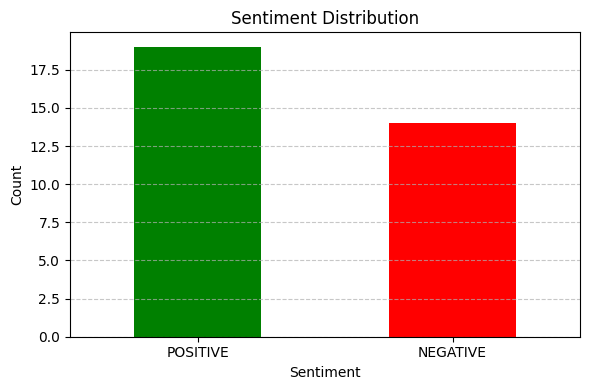

In [ ]:
sentiment_counts = sentiment_df["Sentiment"].value_counts()
plt.figure(figsize=(6, 4))
sentiment_counts.plot(kind="bar", color=["green", "red"])
plt.title("Sentiment Distribution")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()